# How does the model see?

Lets retrain our convolutional model for the Fashion-MNIST dataset and then visualize the filters and pooling.

In [3]:

# Este código construye y entrena una red neuronal convolucional para clasificar imágenes de ropa y accesorios del dataset Fashion MNIST.
# Se aplican técnicas de convolución, pooling, capas densas y se usa softmax en la salida para asignar probabilidades a las 10 clases
# posibles.

# Aquí estamos importando TensorFlow y cargando el conjunto de datos Fashion MNIST, que contiene imágenes de ropa y accesorios en escala
# de grises de tamaño 28x28 píxeles.
# El dataset se divide en:
# * 60,000 imágenes para entrenamiento (training_images)
# * 10,000 imágenes para validación (val_images)
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()

# Preprocesamiento de los datos
# * reshape(60000, 28, 28, 1): Ajustamos la forma de las imágenes para que tengan un único canal (escala de grises), necesario para la
#                             red neuronal convolucional.
# * Dividir por 255.0: Normalizamos los valores de los píxeles (originalmente de 0 a 255) a un rango entre 0 y 1, lo que mejora el
#                      rendimiento del modelo.
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
val_images=val_images.reshape(10000, 28, 28, 1)
val_images=val_images/255.0

# Construcción del modelo
# Aquí definimos una red neuronal convolucional (CNN) para clasificar las imágenes:
# 1. Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1))
# * Capa de convolución con 64 filtros de tamaño 3x3.
# * Usa ReLU para mantener solo valores positivos.
# * input_shape=(28, 28, 1) define la forma de entrada (una imagen de 28x28 con un canal).
# 2. MaxPooling2D(2,2)
# * Reduce el tamaño de la imagen a la mitad usando pooling 2x2, conservando solo valores importantes.
# 3. Segunda capa de convolución y pooling
# * Repetimos el proceso con otra capa Conv2D y MaxPooling2D para mejorar la extracción de características.
# 4. Flatten()
# * Convierte la matriz 2D en un vector 1D para la capa densa.
# 5. Capas densas (Dense)
# * Dense(20, activation='relu'): Capa oculta con 20 neuronas.
# * Dense(10, activation='softmax'): Capa de salida con 10 neuronas, una para cada categoría en Fashion MNIST.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compilación del modelo
# * Optimizador adam: Ajusta los pesos de la red de manera eficiente.
# * Función de pérdida sparse_categorical_crossentropy: Se usa para clasificación multiclase cuando las etiquetas son números enteros en
#   lugar de one-hot vectors.
# * Métrica accuracy: Calcula la precisión del modelo.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Entrenamiento del modelo
# * Entrena el modelo usando 20 épocas, ajustando los parámetros para mejorar la clasificación.
# * Se usa el conjunto de validación (val_images) para medir el rendimiento en datos no vistos.
model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=20)



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        32,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,798 (272.65 KB)

 Trainable params: 69,798 (272.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7479 - loss: 0.6963 - val_accuracy: 0.8646 - val_loss: 0.3755
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8772 - loss: 0.3437 - val_accuracy: 0.8687 - val_loss: 0.3624
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8944 - loss: 0.2927 - val_accuracy: 0.8833 - val_loss: 0.3129
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9102 - loss: 0.2521 - val_accuracy: 0.8994 - val_loss: 0.2798
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9129 - loss: 0.2346 - val_accuracy: 0.8995 - val_loss: 0.2799
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9238 - loss: 0.2083 - val_accuracy: 0.9045 - val_loss: 0.2635
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9273 - loss: 0.1953 - val_accuracy: 0.9057 - val_loss: 0.2625
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9343 - loss: 0.1771

# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[:100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the final dense layers are trained on this resulting data, it's working with a lot less, more targeted, data -- the features generated by this convolution/pooling combination.

In [4]:
print(val_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


--------------
[<KerasTensor shape=(None, 26, 26, 64), dtype=float32, sparse=False, name=keras_tensor_1>, <KerasTensor shape=(None, 13, 13, 64), dtype=float32, sparse=False, name=keras_tensor_2>, <KerasTensor shape=(None, 11, 11, 64), dtype=float32, sparse=False, name=keras_tensor_3>, <KerasTensor shape=(None, 5, 5, 64), dtype=float32, sparse=False, name=keras_tensor_4>, <KerasTensor shape=(None, 1600), dtype=float32, sparse=False, name=keras_tensor_5>, <KerasTensor shape=(None, 20), dtype=float32, sparse=False, name=keras_tensor_6>, <KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_7>]
--------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


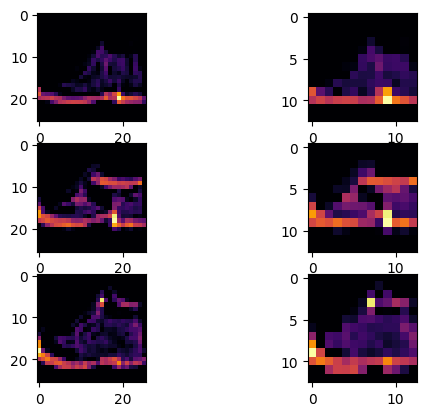

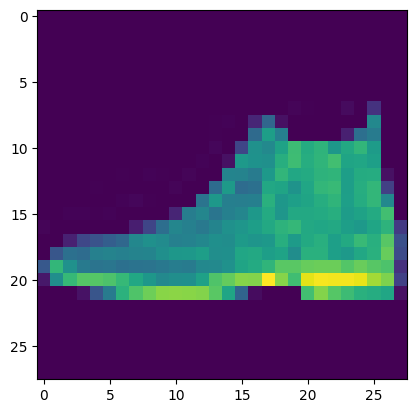

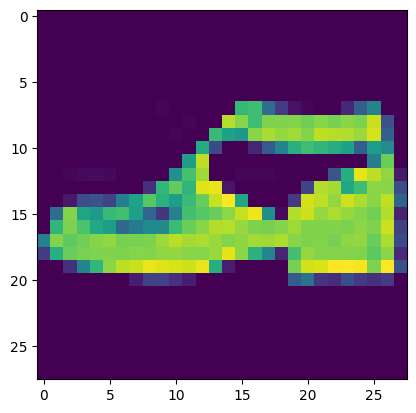

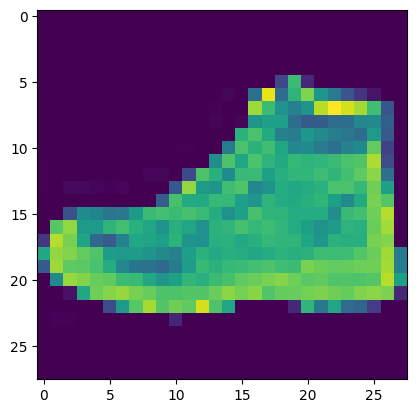

In [8]:
# ¡Este código es muy interesante! Lo que hace es visualizar las activaciones de diferentes capas de la red neuronal convolucional para
# analizar cómo el modelo está interpretando las características de las imágenes.
import matplotlib.pyplot as plt

# * Usa matplotlib.pyplot para mostrar una imagen del conjunto de validación (val_images).
# * La función reshape(28,28) convierte la imagen a un formato visual adecuado.
# * Se desactiva la cuadrícula (grid(False)) para visualizar mejor la imagen.
def show_image(img):
  plt.figure()
  plt.imshow(val_images[img].reshape(28,28))
  plt.grid(False)
  plt.show()

# Crear una matriz de subgráficos
# * Crea una figura con 3 filas y 2 columnas para mostrar varias imágenes filtradas.
# * Permite visualizar cómo diferentes capas de la CNN activan ciertos patrones en la imagen.
# ** plt.subplots(3,2) genera una figura (f) que contiene una matriz de ejes (axarr) de tamaño 3x2.
# ** axarr es una lista de ejes (Axes) que pueden usarse para graficar varias imágenes o gráficos en la misma figura.
# ** Con esta estructura, puedes acceder a cada subgráfico usando índices, por ejemplo:
#                            axarr[0,0]   # Primer gráfico (fila 0, columna 0)
#                            axarr[1,1]   # Gráfico en la segunda fila, segunda columna
f, axarr = plt.subplots(3,2)

# Selección de imágenes
# * Se seleccionan 3 imágenes específicas del conjunto de validación (val_images).
# * Estas imágenes corresponden a la clase 9 en Fashion MNIST (según el comentario en el código, podrían ser zapatos 👟).
# By scanning the list above I saw that the 0, 23 and 28 entries are all label 9
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28

# For shoes (0, 23, 28), Convolution_Number=1 (i.e. the second filter) shows
# the sole being filtered out very clearly
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
# Extracción de las salidas de las capas de la red
# * Se crea un modelo (activation_model) que toma la misma entrada que el modelo original (model).
# * Pero en lugar de producir predicciones finales, nos permite ver las activaciones de cada capa.
# Este código obtiene las salidas de cada capa de tu modelo neuronal model.
# En otras palabras, nos da la forma (shape) y tipo de datos (dtype) de cada tensor que pasa a través de la red.
# Cuando imprimes layer_outputs, ves la forma (shape) de cada salida intermedia en la CNN.
layer_outputs = [layer.output for layer in model.layers]
print("--------------")
print(layer_outputs)
print("--------------")
# Este es el print
# [
#   <KerasTensor shape=(None, 26, 26, 64), dtype=float32, sparse=False, name=keras_tensor_1>,
#    * Primera capa convolucional
#      ** La entrada es de 28x28, pero como usamos un kernel 3x3, la salida se reduce a 26x26 (28 - 3 + 1 = 26).
#      ** Hay 64 filtros, lo que significa que la salida tiene 64 canales.
#   <KerasTensor shape=(None, 13, 13, 64), dtype=float32, sparse=False, name=keras_tensor_2>,
#    * Primera capa de MaxPooling
#      ** Como el pooling es de 2x2, la salida se reduce a la mitad (26 / 2 = 13).
#      ** Los 64 filtros se mantienen.
#   <KerasTensor shape=(None, 11, 11, 64), dtype=float32, sparse=False, name=keras_tensor_3>,
#    * Segunda capa convolucional
#      ** Se aplica otro filtro 3x3, reduciendo la salida a 11x11 (13 - 3 + 1 = 11).
#      ** Se mantienen los 64 canales.
#   <KerasTensor shape=(None, 5, 5, 64), dtype=float32, sparse=False, name=keras_tensor_4>,
#    * Segunda capa de MaxPooling
#      ** Aplicamos MaxPooling 2x2, reduciendo la salida a 5x5 (11 / 2 ≈ 5).
#      ** Se conservan los 64 canales.
#   <KerasTensor shape=(None, 1600), dtype=float32, sparse=False, name=keras_tensor_5>,
#    * Capa Flatten
#      ** Se aplana la salida 5x5x64, convirtiéndola en un vector de 1600 elementos (5 * 5 * 64 = 1600).
#   <KerasTensor shape=(None, 20), dtype=float32, sparse=False, name=keras_tensor_6>,
#    * Capa densa oculta
#      ** Se usa 20 neuronas con activación ReLU.
#   <KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_7>
#    * Capa de salida
#      ** Hay 10 neuronas, una por cada clase en Fashion MNIST.
#      ** Usa softmax para dar probabilidades de clasificación.
# ]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs = layer_outputs)

# Visualización de las activaciones de la CNN
# * Recorre las primeras dos capas del modelo (range(0,2)).
# * Obtiene la activación de cada capa en la imagen seleccionada (FIRST_IMAGE).
# * Extrae el filtro número CONVOLUTION_NUMBER = 1 y lo visualiza con el mapa de colores 'inferno'.
# * Se repite el mismo proceso para SECOND_IMAGE y THIRD_IMAGE.
# Este proceso nos muestra cómo las capas de convolución identifican patrones en las imágenes, como bordes, texturas o estructuras
# específicas.
for x in range(0,2):
  f1 = activation_model.predict(val_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(val_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(val_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Mostrar las imágenes originales
# * Finalmente, muestra las imágenes originales para compararlas con las activaciones generadas por la CNN.
show_image(FIRST_IMAGE)
show_image(SECOND_IMAGE)
show_image(THIRD_IMAGE)